<a href="https://colab.research.google.com/github/issacridhin/S5_Predictive-Analysis/blob/main/2348546_Lab6_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

#Data Collection and Preprocessing

In [5]:
#Microsoft stock data
data = yf.download("MSFT", start="2018-01-01", end="2023-12-31")
data.reset_index(inplace=True)

# Preview the dataset
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                       Date  Adj Close      Close       High        Low  \
Ticker                                 MSFT       MSFT       MSFT       MSFT   
0      2018-01-02 00:00:00+00:00  79.792908  85.949997  86.309998  85.500000   
1      2018-01-03 00:00:00+00:00  80.164246  86.349998  86.510002  85.970001   
2      2018-01-04 00:00:00+00:00  80.869835  87.110001  87.660004  86.570000   
3      2018-01-05 00:00:00+00:00  81.872421  88.190002  88.410004  87.430000   
4      2018-01-08 00:00:00+00:00  81.955994  88.279999  88.580002  87.599998   

Price        Open    Volume  
Ticker       MSFT      MSFT  
0       86.129997  22483800  
1       86.059998  26061400  
2       86.589996  21912000  
3       87.660004  23407100  
4       88.199997  22113000  


In [7]:
# Flatten multi-level columns
data.columns = data.columns.get_level_values(0)

# Preview the dataset to ensure proper column names
print(data.head())


Price                      Date  Adj Close      Close       High        Low  \
0     2018-01-02 00:00:00+00:00  79.792908  85.949997  86.309998  85.500000   
1     2018-01-03 00:00:00+00:00  80.164246  86.349998  86.510002  85.970001   
2     2018-01-04 00:00:00+00:00  80.869835  87.110001  87.660004  86.570000   
3     2018-01-05 00:00:00+00:00  81.872421  88.190002  88.410004  87.430000   
4     2018-01-08 00:00:00+00:00  81.955994  88.279999  88.580002  87.599998   

Price       Open    Volume  
0      86.129997  22483800  
1      86.059998  26061400  
2      86.589996  21912000  
3      87.660004  23407100  
4      88.199997  22113000  


In [8]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing values in 'Date' or 'Close'
data = data.dropna(subset=['Date', 'Close'])


#Exploratory Data Analysis (EDA)

**Closing Price Trend**

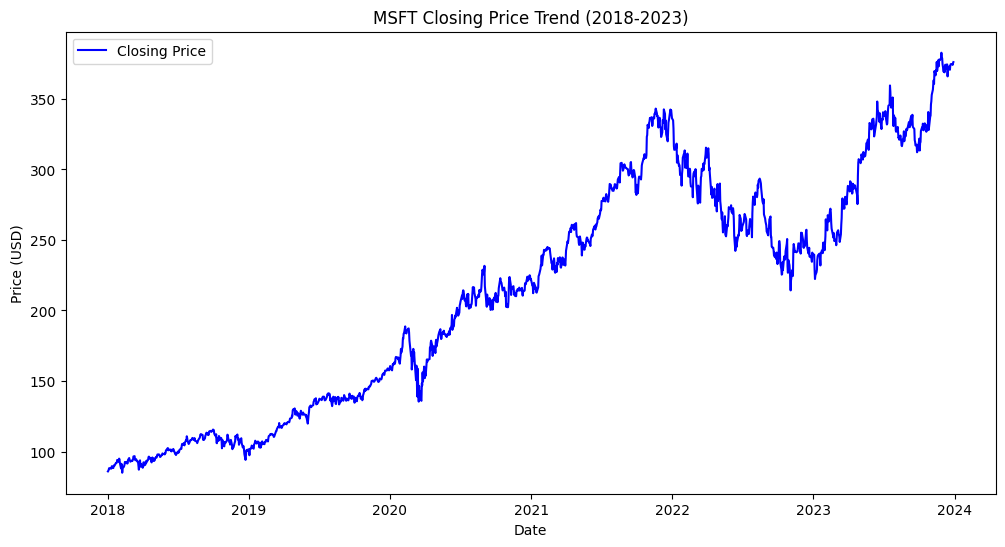

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('MSFT Closing Price Trend (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


**Moving Average Calculation and Visualization**

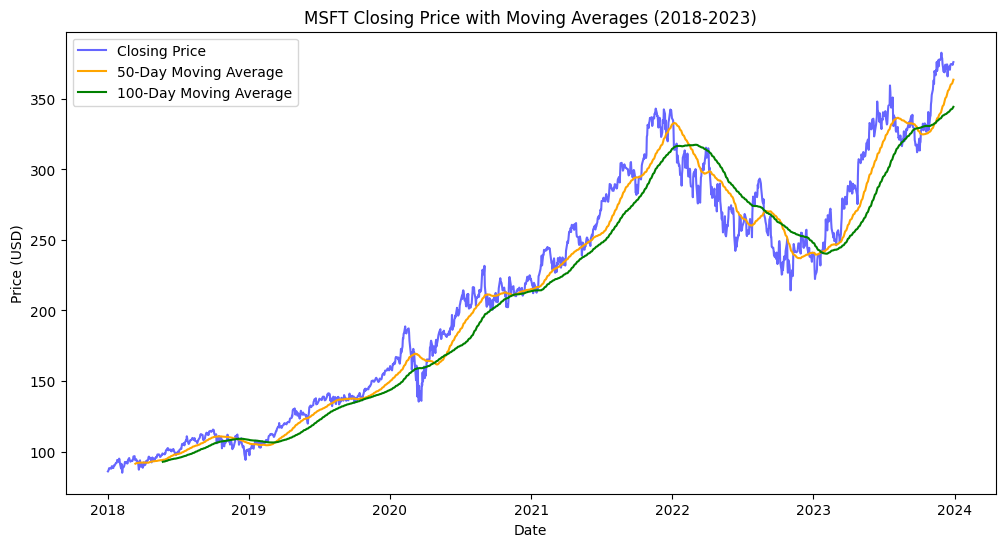

In [11]:
# Calculate moving averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['100_MA'] = data['Close'].rolling(window=100).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(data['Date'], data['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(data['Date'], data['100_MA'], label='100-Day Moving Average', color='green')
plt.title('MSFT Closing Price with Moving Averages (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


**Identify and Plot Major Peaks and Dips**

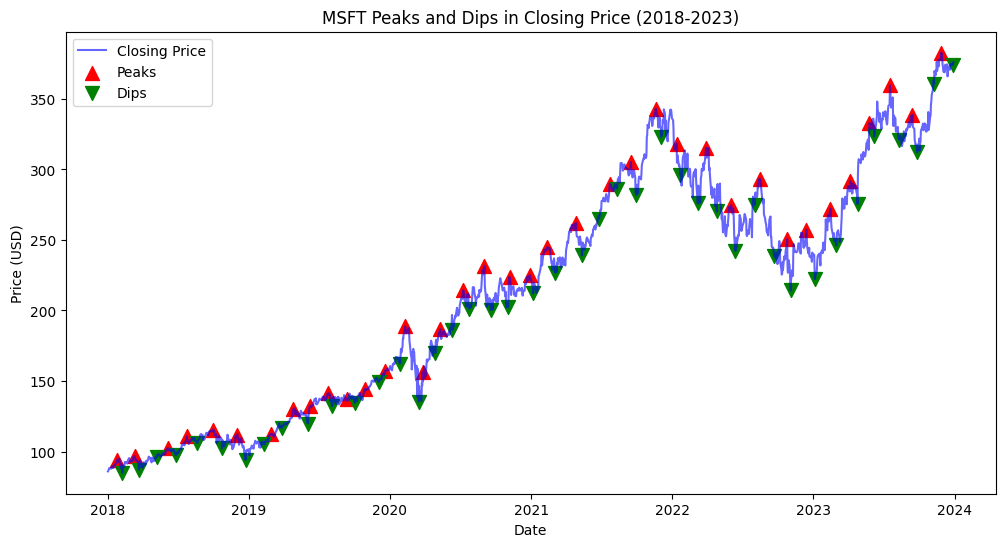

In [12]:
from scipy.signal import find_peaks

# Find peaks and dips in the closing price
peaks, _ = find_peaks(data['Close'], distance=30)
dips, _ = find_peaks(-data['Close'], distance=30)

# Plot closing price with peaks and dips
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.scatter(data['Date'].iloc[peaks], data['Close'].iloc[peaks], label='Peaks', color='red', marker='^', s=100)
plt.scatter(data['Date'].iloc[dips], data['Close'].iloc[dips], label='Dips', color='green', marker='v', s=100)
plt.title('MSFT Peaks and Dips in Closing Price (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


#Time Series Visualization

**Daily OHLC (Open, High, Low, Close) Prices**

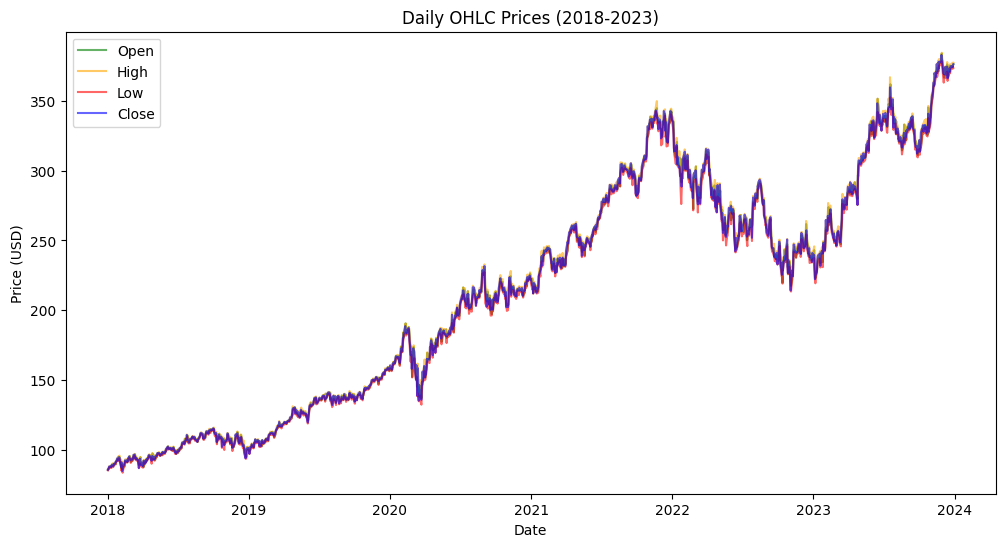

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Open', color='green', alpha=0.6)
plt.plot(data['Date'], data['High'], label='High', color='orange', alpha=0.6)
plt.plot(data['Date'], data['Low'], label='Low', color='red', alpha=0.6)
plt.plot(data['Date'], data['Close'], label='Close', color='blue', alpha=0.6)
plt.title('Daily OHLC Prices (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


**Overlay Daily Volume on Closing Price**

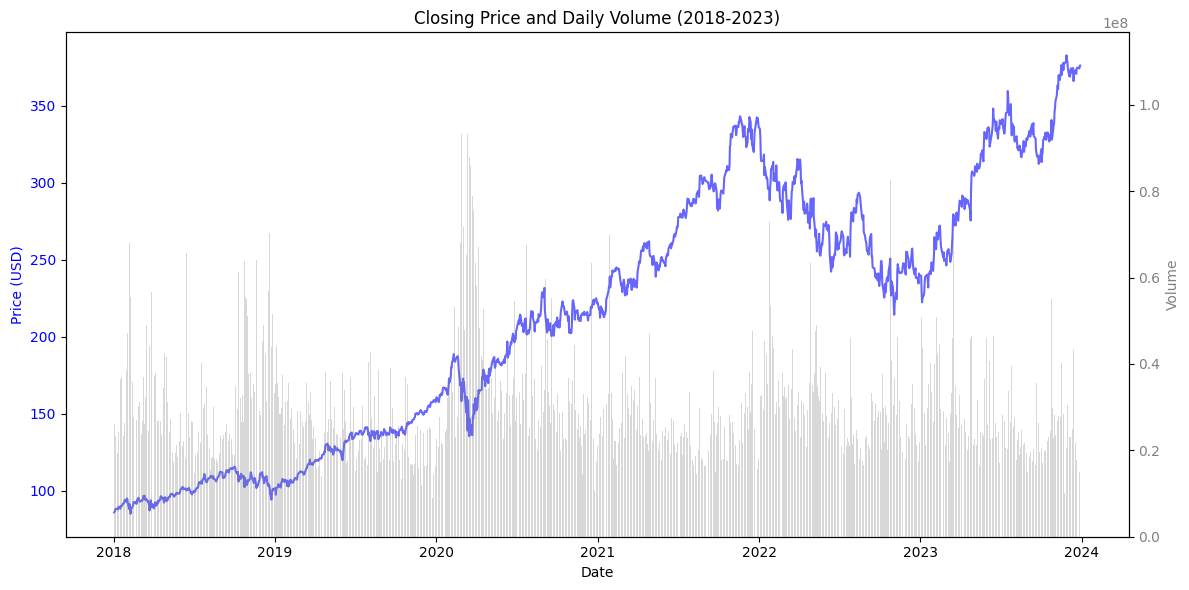

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Closing Price Plot
ax1.plot(data['Date'], data['Close'], label='Closing Price', color='blue', alpha=0.6)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Volume Plot
ax2 = ax1.twinx()
ax2.bar(data['Date'], data['Volume'], label='Volume', color='grey', alpha=0.3, width=1)
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

plt.title('Closing Price and Daily Volume (2018-2023)')
fig.tight_layout()
plt.show()


#Volatility Analysis

**Calculate and Plot Rolling Standard Deviation**

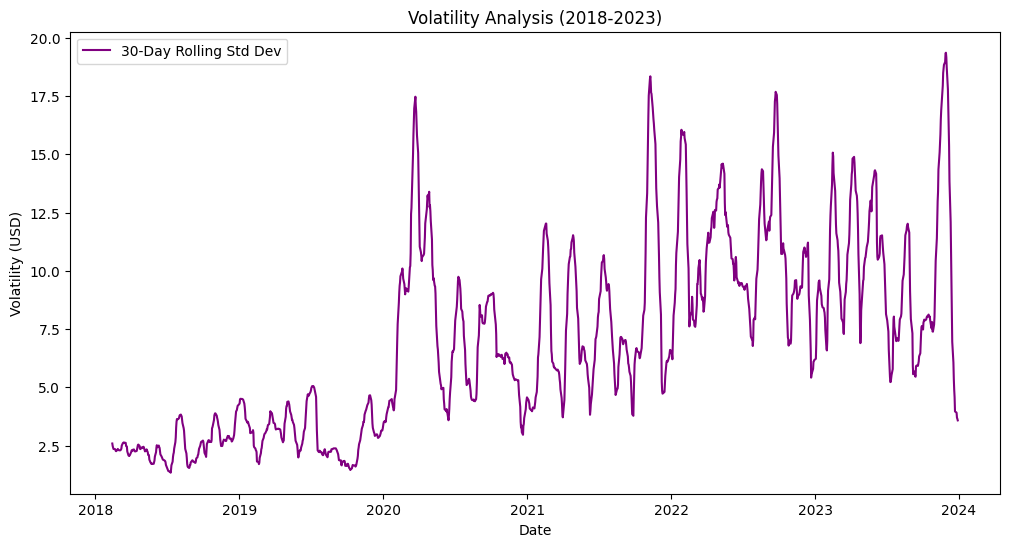

In [15]:
# Calculate rolling standard deviation (volatility)
data['Volatility'] = data['Close'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volatility'], label='30-Day Rolling Std Dev', color='purple')
plt.title('Volatility Analysis (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Volatility (USD)')
plt.legend()
plt.show()


#Forecasting

**Apply ARIMA for Forecasting**

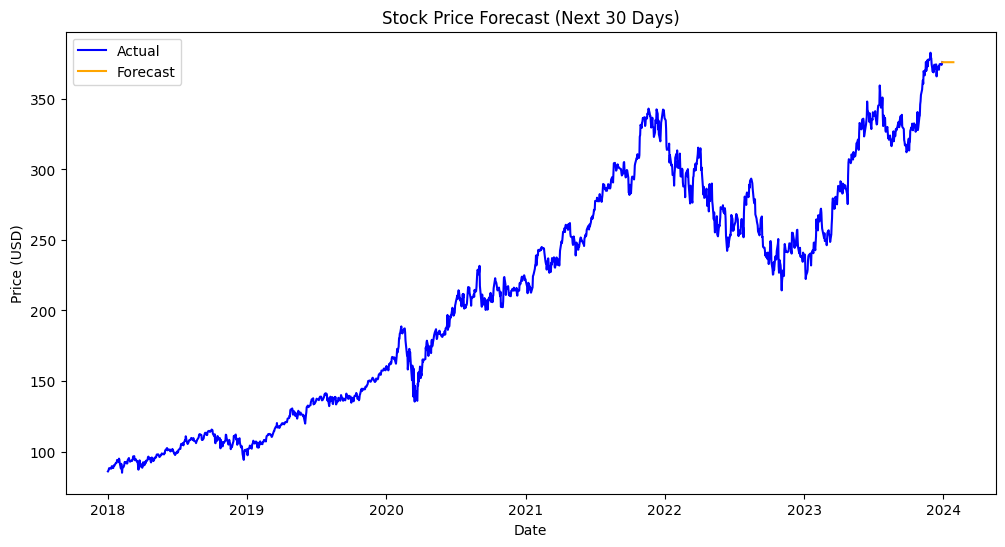

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Use only the 'Close' prices for ARIMA
closing_prices = data['Close'].dropna()

# Train ARIMA model
model = ARIMA(closing_prices, order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual', color='blue')
future_dates = pd.date_range(data['Date'].iloc[-1], periods=30)
plt.plot(future_dates, forecast, label='Forecast', color='orange')
plt.title('Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#Inference

The ARIMA model has generated forecast that indicates a potential upward trend in the stock price for the next 30 days. The forecast line (orange) suggests a gradual increase from the current price level. This could be interpreted as a positive outlook for the stock's performance in the short term.